In [1]:
import pandas as pd

Importing the tweets

In [2]:
df = pd.read_csv("hillary_trump_tweets.csv")
test = df.iloc[:,6] 
print(df.columns.values)

['id' 'handle' 'text' 'is_retweet' 'original_author' 'time'
 'in_reply_to_screen_name' 'in_reply_to_status_id' 'in_reply_to_user_id'
 'is_quote_status' 'lang' 'retweet_count' 'favorite_count' 'longitude'
 'latitude' 'place_id' 'place_full_name' 'place_name' 'place_type'
 'place_country_code' 'place_country' 'place_contained_within'
 'place_attributes' 'place_bounding_box' 'source_url' 'truncated'
 'entities' 'extended_entities']


**Filtering columns**

In [3]:
df_selected = df[["id", "handle", "text", "is_retweet", "time", "lang" ]]
print(df_selected.head())

             id          handle  \
0  7.809260e+17  HillaryClinton   
1  7.809160e+17  HillaryClinton   
2  7.809120e+17  HillaryClinton   
3  7.809070e+17  HillaryClinton   
4  7.808970e+17  HillaryClinton   

                                                text  is_retweet  \
0  The question in this election: Who can put the...       False   
1  Last night, Donald Trump said not paying taxes...        True   
2  Couldn't be more proud of @HillaryClinton. Her...        True   
3  If we stand together, there's nothing we can't...       False   
4  Both candidates were asked about how they'd co...       False   

                  time lang  
0  2016-09-28T00:22:34   en  
1  2016-09-27T23:45:00   en  
2  2016-09-27T23:26:40   en  
3  2016-09-27T23:08:41   en  
4  2016-09-27T22:30:27   en  


**Filtering rows**

In [4]:
df_clean = df_selected[df_selected["lang"] == "en"] # only english tweets
df_clean = df_clean[df_clean["is_retweet"] == False] # only original tweets
print(df_clean.head) 

<bound method NDFrame.head of                 id           handle  \
0     7.809260e+17   HillaryClinton   
3     7.809070e+17   HillaryClinton   
4     7.808970e+17   HillaryClinton   
5     7.808930e+17  realDonaldTrump   
6     7.808840e+17   HillaryClinton   
...            ...              ...   
6439  6.842200e+17  realDonaldTrump   
6440  6.842190e+17  realDonaldTrump   
6441  6.842180e+17  realDonaldTrump   
6442  6.842180e+17  realDonaldTrump   
6443  6.842170e+17  realDonaldTrump   

                                                   text  is_retweet  \
0     The question in this election: Who can put the...       False   
3     If we stand together, there's nothing we can't...       False   
4     Both candidates were asked about how they'd co...       False   
5     Join me for a 3pm rally - tomorrow at the Mid-...       False   
6     This election is too important to sit out. Go ...       False   
...                                                 ...         ...   
6439

***NLTK and Regular Expressions***

In [11]:
import nltk
from nltk import wordnet
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import re 

#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('genesis')
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lale\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [51]:
#for i in range(0, 20):
    #tk = TweetTokenizer()
    #tokens = [w for w in tk.tokenize(df_clean.iloc[i,2].lower()) if w.isalpha()]
    #no_stops = [t for t in tokens if t not in stopwords.words('english')]
    #print(tokens)
    #print(no_stops)
    #word_tokenize(df_clean.iloc[i,2])
    #lower_tokens = [t.lower() for t in tokens]
   #print(lower_tokens)
    #alpha_only = [t for t in df_clean.iloc[i,2] if t.isalpha()]
   #print(alpha_only)
    #no_stops = [t for t in alpha_only if t not in stopwords.words('english')]
    #wordnet_lemmatizer = WordNetLemmatizer()
   #lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]
    #print(no_stops)
 
    #text = df_clean.iloc[i,2]
   # print(text)
    #df_clean.iloc[i,2] = df_clean.iloc[i,2].lower()

**Preprocessing the data**

In [52]:
def cleantext(tweets): # function to clean text
    text = tweets.lower() # lowercase
    text = re.sub(r"[@#][a-z0-9]+", "", text) # remove hashtags and mentions
    text = re.sub(r"https?://[a-z0-9./]+", "", text) # remove links
    tk = TweetTokenizer() # create tokenizer
    text = tk.tokenize(text) # tokenize
    lemmatizer = WordNetLemmatizer() # create lemmatizer
    text = [lemmatizer.lemmatize(t) for t in text] # lemmatize
    text = [t for t in text if t not in stopwords.words('english')] # remove stopwords
    text = [t for t in text if t.isalpha()] # remove non-alphabetic tokens
    text = [t for t in text if len(t) > 2] # remove tokens shorter than 2 characters

    return text # return cleaned text



**Frequency of tokens for Hillary Clinton and Donald Trump**

In [53]:
Hillary_frequencies = {} # create empty dictionary to store the frequency of words for Hillary Clinton
Trump_frequencies = {} #same for Trump

for i in range(0, len(df_clean)): # loop through rows of the dataset
    tweet = df_clean.iloc[i,2] # get tweet
    result = cleantext(tweet) # preprocess tweet using function from the previous cell
    #print(result)

    if df_clean.iloc[i,1] == "HillaryClinton": # if this tweet is from Hillary Clinton
        for token in result: # loop through tokens in cleaned tweet 
            if token in Hillary_frequencies: # if token is already in dictionary that counts the frequencies
                Hillary_frequencies[token] += 1 # add 1 to the frequency count
            else:
                Hillary_frequencies[token] = 1 # if token is not in dictionary yet,
                #frequency count is 1 because she mentions it for the first time
    if df_clean.iloc[i,1] == "realDonaldTrump":
        for token in result:
            if token in Trump_frequencies:
                Trump_frequencies[token] += 1
            else:
                Trump_frequencies[token] = 1


In [54]:
#print(Hillary_frequencies) # print dictionary

#print(max(Hillary_frequencies, key=Hillary_frequencies.get)) # print most frequent token that Hillary Clinton uses
max_Hillary = sorted(Hillary_frequencies, key=Hillary_frequencies.get, reverse=True)[:20] # sort dictionary by frequency count
max_Hillary= [t for t in max_Hillary if len(t) > 3]

max_Trump = sorted(Trump_frequencies, key=Trump_frequencies.get, reverse=True)[:20]
max_Trump = [t for t in max_Trump if len(t) > 3]

for i in max_Hillary:
    print(i, Hillary_frequencies[i])

print()

for i in max_Trump:
    print(i, Trump_frequencies[i])

trump 637
hillary 605
donald 353
president 234
american 198
make 188
america 182
people 171
family 171
woman 144
need 140
country 116
right 106
would 103
together 101
know 93

thank 516
great 459
hillary 337
trump 327
people 222
america 205
cruz 192
clinton 188
crooked 181
make 172
poll 144
vote 137
like 114
tonight 111
president 111


In [55]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

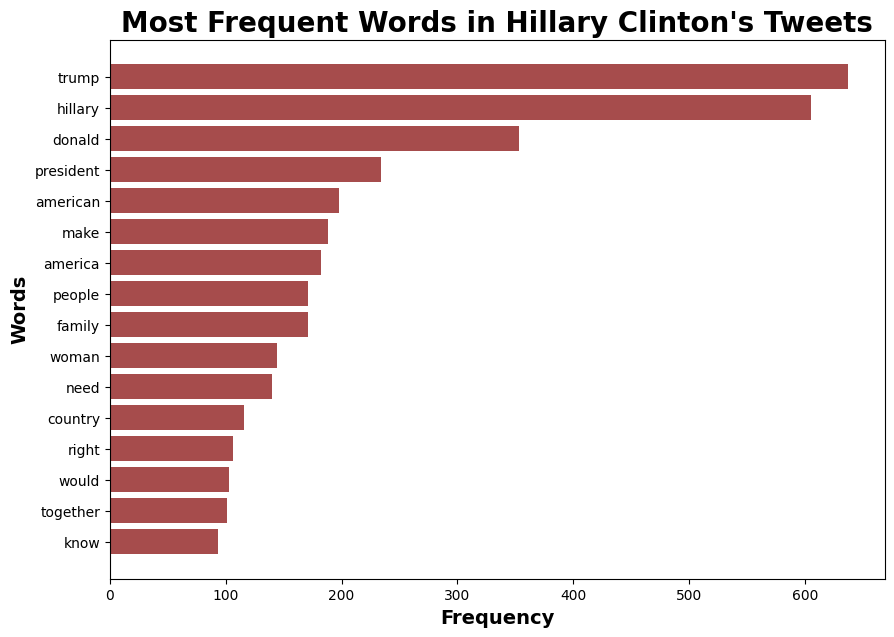

In [56]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.barh(max_Hillary, [Hillary_frequencies[i] for i in max_Hillary], color='maroon', alpha=0.7)
ax.invert_yaxis()
ax.set_title("Most Frequent Words in Hillary Clinton's Tweets", fontsize=20, fontweight='bold', color = 'black')
ax.set_xlabel("Frequency", fontsize=14, fontweight='bold', color = 'black')
ax.set_ylabel("Words", fontsize=14, fontweight='bold', color = 'black')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

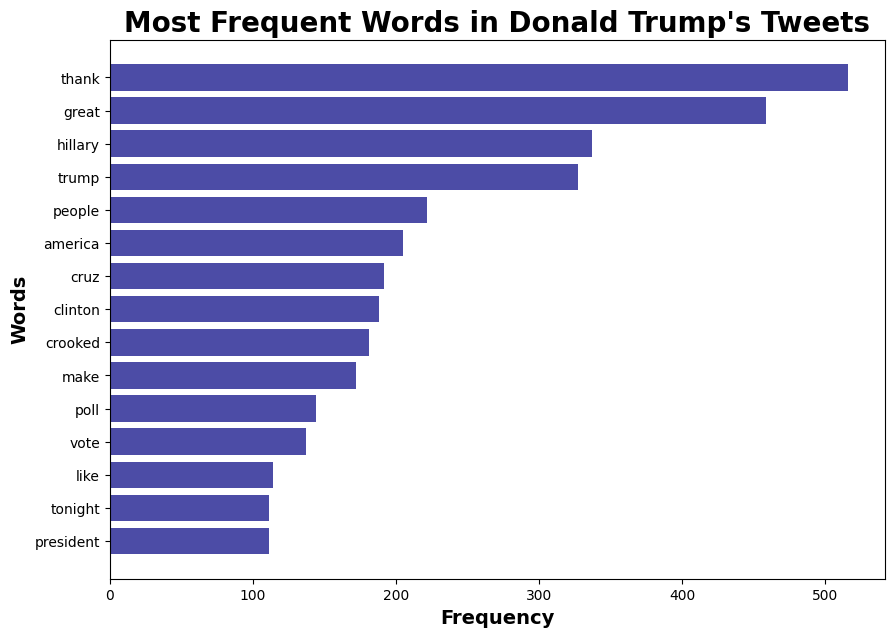

In [57]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.barh(max_Trump, [Trump_frequencies[i] for i in max_Trump], color='navy', alpha=0.7)
ax.invert_yaxis()
ax.set_title("Most Frequent Words in Donald Trump's Tweets", fontsize=20, fontweight='bold', color = 'black')
ax.set_xlabel("Frequency", fontsize=14, fontweight='bold', color = 'black')
ax.set_ylabel("Words", fontsize=14, fontweight='bold', color = 'black')
plt.show

In [58]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lale\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [59]:
sia.polarity_scores("The question in this election: Who can put the plans into action that will make your life better?") #example from the 1st tweet

{'neg': 0.0, 'neu': 0.854, 'pos': 0.146, 'compound': 0.4404}

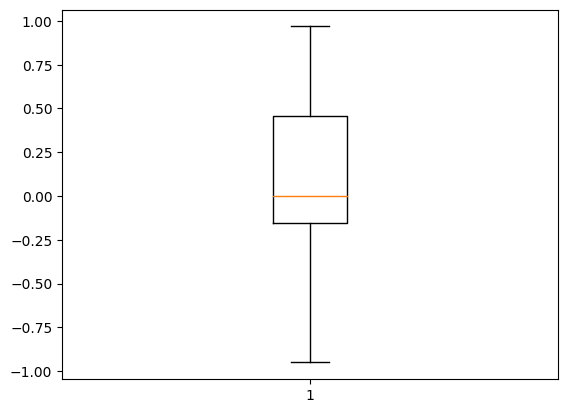

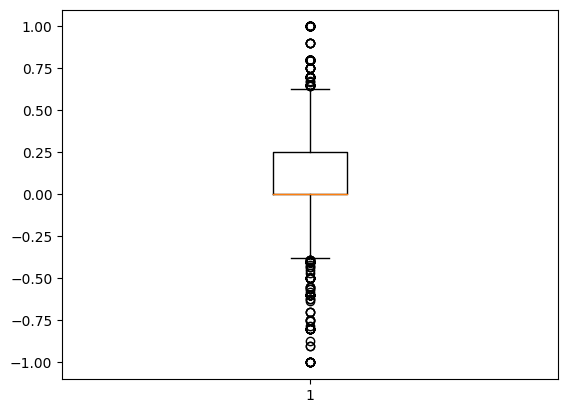

             id           handle  \
0  7.809260e+17   HillaryClinton   
1  7.809070e+17   HillaryClinton   
2  7.808970e+17   HillaryClinton   
3  7.808930e+17  realDonaldTrump   
4  7.808840e+17   HillaryClinton   

                                                text  is_retweet  \
0  The question in this election: Who can put the...       False   
1  If we stand together, there's nothing we can't...       False   
2  Both candidates were asked about how they'd co...       False   
3  Join me for a 3pm rally - tomorrow at the Mid-...       False   
4  This election is too important to sit out. Go ...       False   

                  time lang  
0  2016-09-28T00:22:34   en  
1  2016-09-27T23:08:41   en  
2  2016-09-27T22:30:27   en  
3  2016-09-27T22:13:24   en  
4  2016-09-27T21:35:28   en  


In [60]:
from textblob import TextBlob

def get_sentiment_scores_vader(text): # function to get sentiment scores
    scores = sia.polarity_scores(text) # get polarity scores
    return scores # return scores

def get_sentiment_scores_SpaCy(text): # function to get sentiment scores
    blob = TextBlob(text)
    return blob.sentiment_assessments.polarity #return scores


Hillary_polarity_vader = []
Trump_polarity_vader = []
Hillary_polarity_SpaCy = []
Trump_polarity_SpaCy = []

df_clean = df_clean.reset_index(drop=True)


for index, row in df_clean.iterrows():
    text = row["text"]
    text = text.lower() # lowercase
    text = re.sub(r"[@#][a-z0-9]+", "", text) # remove hashtags and mentions
    text = re.sub(r"https?://[a-z0-9./]+", "", text) # remove links
    #result = cleantext(text)
    sentiment_scores_SpaCy = get_sentiment_scores_SpaCy(text)
    sentiment_scores_vader = get_sentiment_scores_vader(text)["compound"]

   # print(sentiment_scores_SpaCy)
    #print(sentiment_scores_vader)
    #    
    ####
    if df_clean.iloc[index,1] == "HillaryClinton":
        Hillary_polarity_vader.append(sentiment_scores_vader)
    else:
        Trump_polarity_vader.append(sentiment_scores_vader)

    if df_clean.iloc[index,1] == "HillaryClinton":
        Hillary_polarity_SpaCy.append(sentiment_scores_SpaCy)
    else:  
        Trump_polarity_SpaCy.append(sentiment_scores_SpaCy)
            

    #####
    #print(f"Text: {text}" )
    #print(f"Sentiment scores: {sentiment_scores_vader}")
    #print("--------------------")
    
    #if index > 200:
plt.boxplot(Hillary_polarity_vader)
plt.show()
plt.boxplot(Hillary_polarity_SpaCy)#Trump_polarity_vader)
plt.show()
print(df_clean.head())
        #break


        

In [73]:
from nltk.collocations import *

test = "Crooked Hillary is bad! I am the best! Hillary has a smelly butt and I am the best! Hillary is good and I am the loser!"
ttokens = nltk.wordpunct_tokenize(test)


bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(ttokens)

results = finder.nbest(bigram_measures.pmi, 10)
print(results)
print()


Hillary_filter = lambda *w: 'Hillary' not in w


# only bigrams that contain 'creature'
finder.apply_ngram_filter(Hillary_filter)

# return the 10 n-grams with the highest PMI
results = finder.nbest(bigram_measures.likelihood_ratio, 100)

print(results)


#######################

speicher = []

for col in results:
   #phrase = col[0] + " " + col[1]

   tags = nltk.pos_tag(col)

   if tags[0][0] != 'has' and tags[1][0] != 'has':
   #if tags[0][1] != 'VBZ' and tags[1][1] != 'VBZ' and tags[0][1] != '.' and tags[1][1] != '.':
      #print(tags[1][1])
      #print(tags[1][1] != 'VBZ')
      speicher.append(col)


#print(speicher)
      



[('a', 'smelly'), ('has', 'a'), ('smelly', 'butt'), ('butt', 'and'), ('good', 'and'), ('is', 'bad'), ('is', 'good'), ('Crooked', 'Hillary'), ('Hillary', 'has'), ('Hillary', 'is')]

[('Hillary', 'is'), ('!', 'Hillary'), ('Crooked', 'Hillary'), ('Hillary', 'has')]


In [218]:
def hillary_coll(tokens):
    collocation = []

    filter_stops = lambda w: w in stopwords.words('english')
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)

    Hillary_filter = lambda *w: 'hillary' not in w and 'clinton' not in w
    finder.apply_ngram_filter(Hillary_filter)
    finder.apply_word_filter(filter_stops)

    results = finder.nbest(bigram_measures.likelihood_ratio, 5)


    for pair in results:
        if "clinton" in pair:
            continue
        else:
            for word in pair:
                if word == "hillary" or len(word) < 4:
                    continue
                else:
                    collocation.append(word)

    
    return collocation



In [219]:
def trump_coll(tokens):

    trump_collocation = []
    
    filter_stops = lambda w: w in stopwords.words('english')
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    

    Donald_filter = lambda *w: 'trump' not in w and 'donald' not in w
    finder.apply_ngram_filter(Donald_filter)
    finder.apply_word_filter(filter_stops)

    results = finder.nbest(bigram_measures.likelihood_ratio, 5)


    for pair in results:
        if "donald" in pair:
            continue
        else:
            for word in pair:
                if word == "trump" or len(word) < 4:
                    continue
                else:
                    trump_collocation.append(word)
    
    return trump_collocation

In [220]:
Hillary_coll_frequencies = list() # create empty dictionary to store the frequency of words for Hillary Clinton
Trump_coll_frequencies = list() #{} #same for Trump



for i in range(0, len(df_clean)):# len(df_clean)): # loop through rows of the dataset
    tweet = df_clean.iloc[i,2] # get tweet
    #result = cleantext(tweet) # preprocess tweet using function from the previous cell
    tweet = re.sub(r"https?://[a-z0-9./]+", "", tweet)
    tweet = re.sub(r"@[a-z0-9]+", "", tweet)
    result = nltk.wordpunct_tokenize(tweet)
    decap = [word.lower() for word in result]
    #print(decap)

    if "trump" in decap: # if the word "trump" is in the tweet
        pass
        #print(tweet)

    if df_clean.iloc[i,1] == "HillaryClinton": # if this tweet is from Hillary Clinton
        collocation_1 = trump_coll(decap) 
        #print(collocation_1) # print collocations

        if len(collocation_1) > 0:
            Trump_coll_frequencies.extend(collocation_1) # append collocations to the dictionary
        #print(result)
        

        #now collocations!
        #hillary_coll = my_hillary_collocation_function(result)

    if df_clean.iloc[i,1] == "realDonaldTrump":
        collocation_2= hillary_coll(decap)
        if len(collocation_2) > 0:
            Hillary_coll_frequencies.extend(collocation_2)
        #print(collocation_2)

print(Hillary_coll_frequencies)
print(len(Hillary_coll_frequencies))

print(Trump_coll_frequencies)
print(len(Trump_coll_frequencies))
    

['shows', 'crooked', 'says', 'gave', 'crooked', 'well', 'notice', 'crooked', 'crooked', 'crooked', 'wants', 'said', 'last', 'hurt', 'leads', 'covered', 'lies', 'crooked', 'crooked', 'crooked', 'type', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'getting', 'lists', 'crooked', 'called', 'crooked', 'referring', 'crooked', 'crooked', 'crooked', 'beating', 'protects', 'crooked', 'crooked', 'saying', 'crooked', 'said', 'crooked', '....', 'believe', 'support', 'hurt', 'voted', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'speak', 'crooked', 'crooked', 'said', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'would', 'crooked', 'crooked', 'knew', 'crooked', 'crooked', 'crooked', 'victory', 'crooked', 'crooked', 'crooked', 'sousa', 'crooked', 'crooked', 'crooked', 'hates', 'crooked', 'crooked', 'picks', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'crooked', 'administration', 'crook

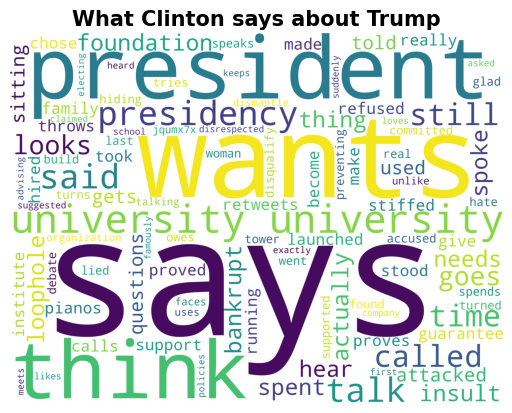

In [282]:
from wordcloud import WordCloud

# Generate a word cloud image
wc_trump= WordCloud(background_color="white",width=2000, height=1500, scale=1.5 ).generate(' '.join(Hillary_coll_frequencies))
plt.axis("off")
plt.title("What Trump says about Clinton", fontsize=15, fontweight='bold', loc='center')
#plt.imshow(wc_trump)

wc_hillary = WordCloud(background_color="white",width=2000, height=1500, scale=1.5, max_words=100 ).generate(' '.join(Trump_coll_frequencies))
plt.axis("off")
plt.title("What Clinton says about Trump", fontsize=15, fontweight='bold', loc='center')
plt.imshow(wc_hillary)
